#### A basic NN built from scratch. 
Achieves 90% accuracy on MNIST dataset. 

In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv("mnist_train.csv")
data = np.array(data)
m,n = data.shape
# dataset has 1 row of headers, (label, pixel1, pixel2, pixel3, ... pixel 784)
# 59999 rows of data (m = 59999)
# dataset has 785 columns (n = 785)
# 1 column for label (0,1,2 ... 9)
# 784 columns for pixel values (0-256)

# the first 1000 rows will be used for "dev" testing
# we do a transpose so we can easily separate the label from the pixels
data_dev = data[0:1000].T 
Y_dev = data_dev[0] # label
X_dev = data_dev[1:n] # pixels

# this is the remaining 58999 rows of data that we'll use for training
# we do a transpose so we can easily separate the label from the pixels
data_train = data[1000:m].T
Y_train = data_train[0] # row of length 58999
X_train = data_train[1:n] # 784 rows, 58999 columns, 
X_train = X_train/255
X_dev = X_dev/255


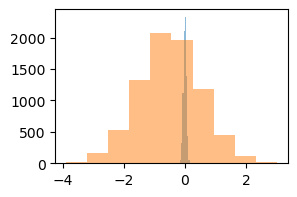

In [46]:
def init_params():
    W1 = np.random.randn(10, 784) * np.sqrt(2/784)
    W2 = np.random.randn(10, 10) * np.sqrt(2/10)
    b1 = np.zeros((10, 1))
    b2 = np.zeros((10, 1))

    # these init_params caused vanishing gradients.
    # W1 = np.random.randn(10,784) - 0.5
    # W2 = np.random.randn(10,10) - 0.5
    # b1 = np.random.randn(10,1) - 0.5
    # b2 = np.random.randn(10,1) - 0.5
    return W1,b1,W2,b2

m1 = np.random.randn(10, 784) * np.sqrt(2/784) # , zero mean, small variance
m2 = np.random.randn(10,784) - 0.5 # mean shifted, large variance
plt.figure(figsize=(3, 2))
plt.hist(m1.flatten(),alpha=0.5)
plt.hist(m2.flatten(),alpha=0.5)
plt.show()

In [6]:
def ReLU(Z):
    # if Z > 0: return Z
    # else : return 0
    return np.maximum(0,Z)

def deriv_ReLU(Z):
    # if Z > 0: return 1
    # else : return 0
    return (Z > 0).astype(float)

def softmax(Z):
    maxZ = np.max(Z,    axis = 0, keepdims=True)
    expZ = np.exp(Z - maxZ)
    sumZ = np.sum(expZ, axis = 0, keepdims=True)
    return expZ/sumZ

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return (Z1,A1,Z2,A2)

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1,keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1, axis=1,keepdims=True)
    return (dW1, db1, dW2, db2)

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha*dW1
    b1 -= alpha*db1
    W2 -= alpha*dW2
    b2 -= alpha*db2
    return (W1,b1,W2,b2)
    
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size

def gradient_descent(X,Y,iterations,alpha):
    W1,b1,W2,b2 = init_params()
    for i in range(iterations+1):
        Z1,A1,Z2,A2 = forward_prop(W1,b1,W2,b2,X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        if i%50 == 0:
            print(f"{i} : {get_accuracy(get_predictions(A2),Y)}")

    return W1,b1,W2,b2

In [7]:
W1,b1,W2,b2 =gradient_descent(X_train,Y_train,500,0.1)

[2 9 9 ... 9 9 9] [7 1 1 ... 5 6 8]
0 : 0.08639129476770793
[4 1 1 ... 5 6 8] [7 1 1 ... 5 6 8]
50 : 0.6977575891116798
[4 1 1 ... 5 6 8] [7 1 1 ... 5 6 8]
100 : 0.7984542110883235
[4 1 1 ... 5 6 8] [7 1 1 ... 5 6 8]
150 : 0.8400481364090917
[4 1 1 ... 5 6 8] [7 1 1 ... 5 6 8]
200 : 0.8613535822641062
[7 1 1 ... 5 6 8] [7 1 1 ... 5 6 8]
250 : 0.8730486957406057
[7 1 1 ... 5 6 8] [7 1 1 ... 5 6 8]
300 : 0.8808284886184512
[7 1 1 ... 5 6 8] [7 1 1 ... 5 6 8]
350 : 0.8871506296716893
[7 1 1 ... 5 6 8] [7 1 1 ... 5 6 8]
400 : 0.891659180664079
[7 1 1 ... 5 6 8] [7 1 1 ... 5 6 8]
450 : 0.8952524619061341
[7 1 1 ... 5 6 8] [7 1 1 ... 5 6 8]
500 : 0.8983203105137375
